In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Cucumber/training'
valid_path = '/content/drive/MyDrive/Cucumber/testing'

In [3]:
# Import the inceptionV3 library as shown below and add preprocessing layer to the front of inceptionV3
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 2s 0us/step


In [4]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Cucumber/training/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [17]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [25]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [26]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [27]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [28]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cucumber/training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 474 images belonging to 2 classes.


In [29]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cucumber/testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 222 images belonging to 2 classes.


In [30]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
15/15 [==============================] - 69s 4s/step - loss: 1.3792 - accuracy: 0.8745 - val_loss: 0.5650 - val_accuracy: 0.9144
Epoch 2/15
15/15 [==============================] - 63s 4s/step - loss: 0.4115 - accuracy: 0.9518 - val_loss: 0.7195 - val_accuracy: 0.9144
Epoch 3/15
15/15 [==============================] - 63s 4s/step - loss: 0.2355 - accuracy: 0.9702 - val_loss: 0.8491 - val_accuracy: 0.9144
Epoch 4/15
15/15 [==============================] - 63s 4s/step - loss: 0.2294 - accuracy: 0.9640 - val_loss: 0.7575 - val_accuracy: 0.8964
Epoch 5/15
15/15 [==============================] - 62s 4s/step - loss: 0.0529 - accuracy: 0.9896 - val_loss: 0.7631 - val_accuracy: 0.9099
Epoch 6/15
15/15 [==============================] - 62s 4s/step - loss: 0.1126 - accuracy: 0.9769 - val_loss: 1.0853 - val_accuracy: 0.8829
Epoch 7/15
15/15 [==============================] - 61s 4s/step - loss: 0.2398 - accuracy: 0.9704 - val_loss: 0.6395 - val_accuracy: 0.9099
Epoch 8/15
15/15 [==

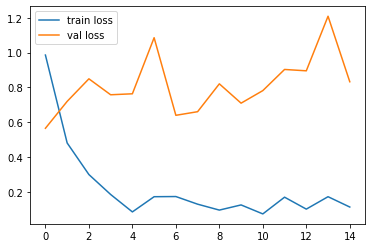

<Figure size 432x288 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


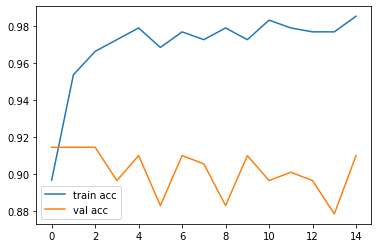

<Figure size 432x288 with 0 Axes>

In [32]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [33]:
model.save('cucumberinception.h5')

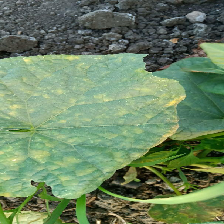

In [34]:
img=image.load_img('/content/drive/MyDrive/Cucumber/testing/Ill_cucumber/photo_2020-06-27_23-53-51.jpg',target_size=(224,224))
img

In [35]:
x=image.img_to_array(img)
x


array([[[104., 106., 103.],
        [ 95., 100.,  96.],
        [ 92.,  96.,  95.],
        ...,
        [ 36.,  44.,  47.],
        [ 40.,  50.,  52.],
        [ 40.,  51.,  53.]],

       [[166., 176., 178.],
        [155., 165., 167.],
        [151., 161., 162.],
        ...,
        [ 38.,  46.,  49.],
        [ 39.,  49.,  51.],
        [ 29.,  40.,  42.]],

       [[109., 126., 133.],
        [ 95., 110., 115.],
        [ 94., 107., 113.],
        ...,
        [ 34.,  42.,  45.],
        [ 32.,  42.,  44.],
        [ 31.,  42.,  44.]],

       ...,

       [[124., 172.,  86.],
        [110., 167.,  60.],
        [108., 167.,  59.],
        ...,
        [107., 144., 101.],
        [118., 144., 105.],
        [ 80.,  94.,  61.]],

       [[158., 197., 132.],
        [119., 168.,  79.],
        [119., 173.,  77.],
        ...,
        [104., 162., 104.],
        [124., 177., 121.],
        [ 74., 121.,  66.]],

       [[131., 162.,  84.],
        [125., 167.,  67.],
        [115., 1

In [36]:
x=x/255
x

array([[[0.40784314, 0.41568628, 0.40392157],
        [0.37254903, 0.39215687, 0.3764706 ],
        [0.36078432, 0.3764706 , 0.37254903],
        ...,
        [0.14117648, 0.17254902, 0.18431373],
        [0.15686275, 0.19607843, 0.20392157],
        [0.15686275, 0.2       , 0.20784314]],

       [[0.6509804 , 0.6901961 , 0.69803923],
        [0.60784316, 0.64705884, 0.654902  ],
        [0.5921569 , 0.6313726 , 0.63529414],
        ...,
        [0.14901961, 0.18039216, 0.19215687],
        [0.15294118, 0.19215687, 0.2       ],
        [0.11372549, 0.15686275, 0.16470589]],

       [[0.42745098, 0.49411765, 0.52156866],
        [0.37254903, 0.43137255, 0.4509804 ],
        [0.36862746, 0.41960785, 0.44313726],
        ...,
        [0.13333334, 0.16470589, 0.1764706 ],
        [0.1254902 , 0.16470589, 0.17254902],
        [0.12156863, 0.16470589, 0.17254902]],

       ...,

       [[0.4862745 , 0.6745098 , 0.3372549 ],
        [0.43137255, 0.654902  , 0.23529412],
        [0.42352942, 0

In [37]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [38]:
model.predict(img_data)

array([[0.94593006, 0.09006619]], dtype=float32)

In [39]:
a=np.argmax(model.predict(img_data), axis=1)

In [40]:
a==0

array([ True])